In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/foodWatageData.csv'
data = pd.read_csv(file_path)
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [67]:
def clean_dataset(df):
    df.columns = df.columns.str.strip()

    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].str.strip()

    df = df.drop_duplicates()
    df = df.dropna()

    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype(str)
        elif df[col].dtype in ['int64', 'float64']:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        df = df[df[col] >= 0]

    df.reset_index(drop=True, inplace=True)

    return df
cleaned_data = clean_dataset(data)

print(cleaned_data.info())
print(cleaned_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [68]:
cleaned_data.to_csv('cleaned_food_waste.csv', index=False)
print(f"Cleaned dataset shape: {cleaned_data.shape}")


Cleaned dataset shape: (214, 12)


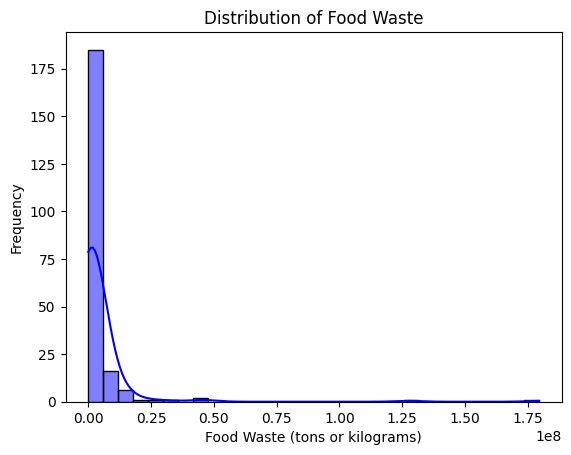

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

cleaned_data['Food_Waste'] = cleaned_data['Household estimate (tonnes/year)'] + \
                             cleaned_data['Retail estimate (tonnes/year)'] + \
                             cleaned_data['Food service estimate (tonnes/year)']

sns.histplot(cleaned_data['Food_Waste'], kde=True, bins=30, color='blue')
plt.title('Distribution of Food Waste')
plt.xlabel('Food Waste (tons or kilograms)')
plt.ylabel('Frequency')
plt.show()

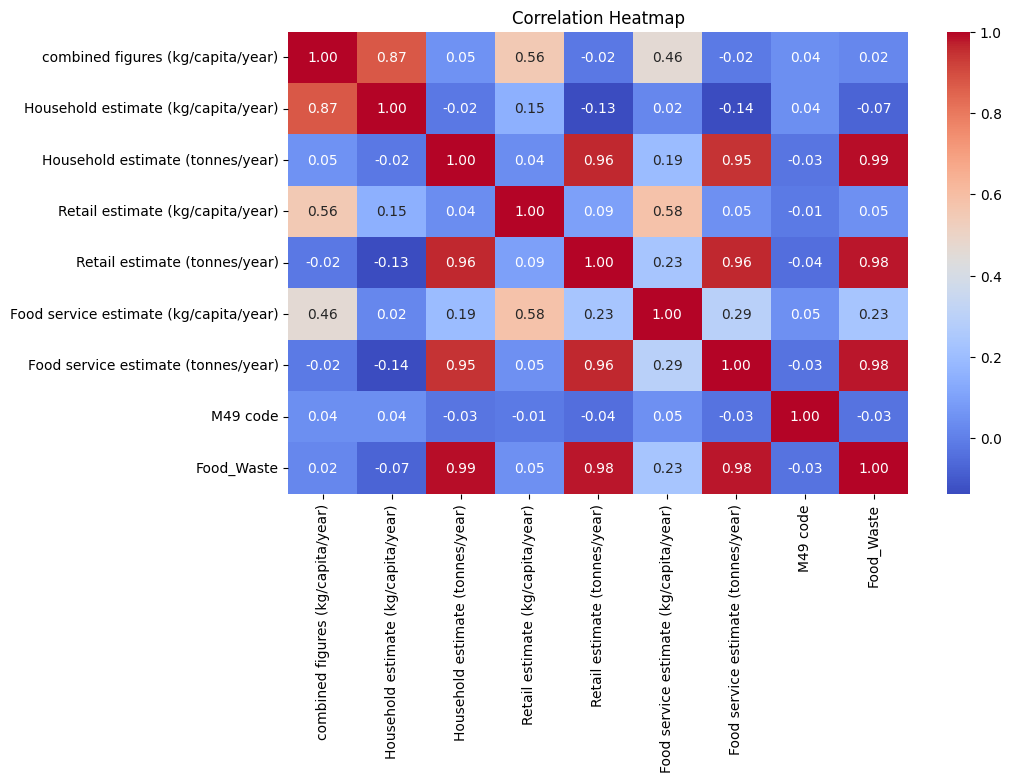

In [45]:
plt.figure(figsize=(10, 6))
numeric_data = cleaned_data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

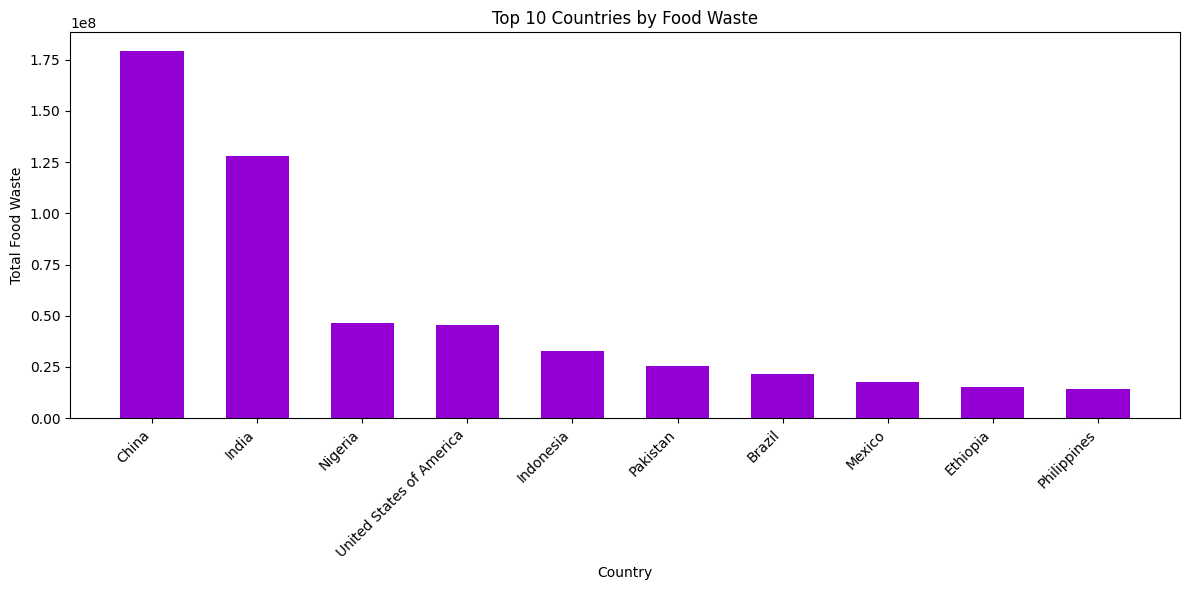

In [46]:
top_countries = cleaned_data.groupby('Country')['Food_Waste'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(top_countries.index, top_countries.values, color='darkviolet', width=0.6)
plt.title('Top 10 Countries by Food Waste')
plt.xlabel('Country')
plt.ylabel('Total Food Waste')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-47-c0e082bea67a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='combined figures (kg/capita/year)', data=top_countries, palette='viridis')


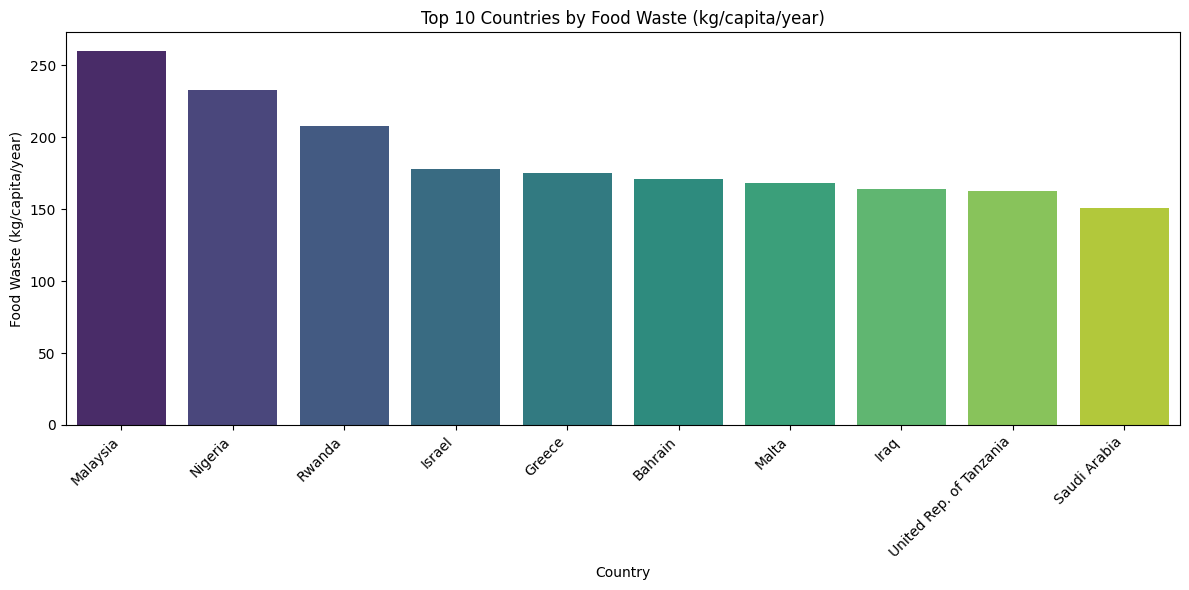

In [47]:
top_countries = cleaned_data[['Country', 'combined figures (kg/capita/year)']].sort_values(by='combined figures (kg/capita/year)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='combined figures (kg/capita/year)', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Food Waste (kg/capita/year)')
plt.xlabel('Country')
plt.ylabel('Food Waste (kg/capita/year)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


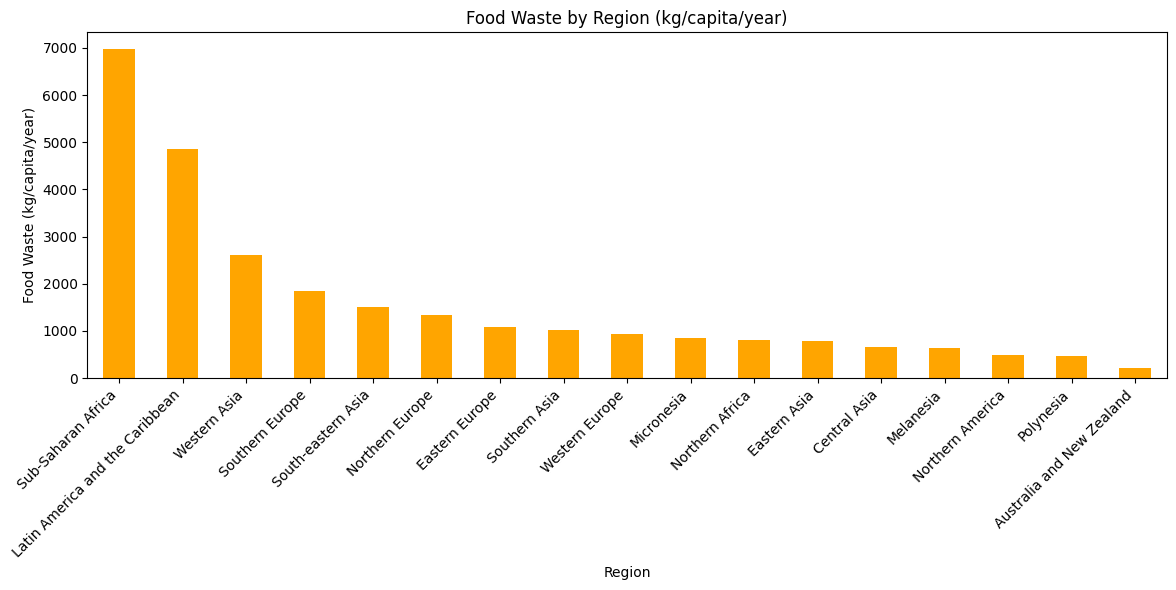

In [48]:
region_waste = cleaned_data.groupby('Region')['combined figures (kg/capita/year)'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
region_waste.plot(kind='bar', color='orange')
plt.title('Food Waste by Region (kg/capita/year)')
plt.xlabel('Region')
plt.ylabel('Food Waste (kg/capita/year)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

cleaned_data = pd.get_dummies(cleaned_data, columns=['Region', 'Confidence in estimate'])

X = cleaned_data.drop(columns=['Country', 'combined figures (kg/capita/year)', 'Source'])
y = cleaned_data['combined figures (kg/capita/year)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 3.277507757418458e-20


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE: {-scores.mean()}')

Cross-Validation MSE: 1.360390988386618e-16


In [52]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 1.0


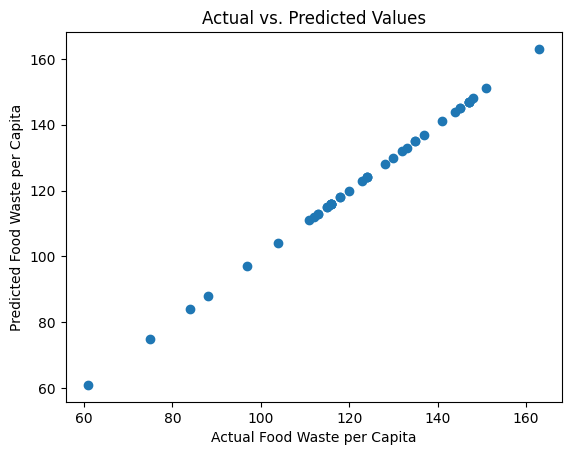

In [63]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Food Waste per Capita')
plt.ylabel('Predicted Food Waste per Capita')
plt.title('Actual vs. Predicted Values')
plt.show()

In [64]:
# Define 'Total Waste' as the sum of relevant waste types
data['Total Waste'] = data['Household estimate (tonnes/year)'] + \
                      data['Retail estimate (tonnes/year)'] + \
                      data['Food service estimate (tonnes/year)'] + \
                      0
# Now you can use the defined 'Total Waste' in the calculation
reduction_factor = 0.1
reduced_total_waste = data['Total Waste'] * (1 - reduction_factor)
total_reduced_waste = reduced_total_waste.sum()

print(f"\nIf food waste could be reduced by 10%, the total reduction in waste would be: {total_reduced_waste:.2f} tons")


If food waste could be reduced by 10%, the total reduction in waste would be: 837771543.90 tons


In [62]:
print("\nConclusion:")
print("Based on our analysis, the most impactful source for reducing food waste is identified.")
print("Recommendations include targeted programs, technological solutions, and community awareness campaigns.")
print("Predictive modeling indicates that by implementing strategies to reduce food waste by 10%, significant amounts of waste can be avoided.")



Conclusion:
Based on our analysis, the most impactful source for reducing food waste is identified.
Recommendations include targeted programs, technological solutions, and community awareness campaigns.
Predictive modeling indicates that by implementing strategies to reduce food waste by 10%, significant amounts of waste can be avoided.
